In [4]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
from scipy import stats
from numpy import median
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from rgf.sklearn import RGFRegressor

# Reading training data from the local storage
filename = 'train.csv' 
df_train = pd.read_csv(filename)

# read test data
df_test = pd.read_csv('test.csv')

# rename some columns
df_train.rename(columns={'weathersit':'weather',
                     'mnth':'month',
                     'hr':'hour',
                     'yr':'year',
                     'hum': 'humidity',
                     'cnt':'count'},inplace=True)

# change some int values to categorical ones
df_train['season'] = df_train.season.astype('category')
df_train['year'] = df_train.year.astype('category')
df_train['month'] = df_train.month.astype('category')
#df_train['hour'] = df_train.hour.astype('category')
df_train['holiday'] = df_train.holiday.astype('category')
#df_train['weekday'] = df_train.weekday.astype('category')
df_train['workingday'] = df_train.workingday.astype('category')
df_train['weather'] = df_train.weather.astype('category')

df_train['count']=df_train['count'].apply(lambda x:np.log(x))
df_train = df_train.drop(['atemp', 'casual', 'registered', 'windspeed'], axis=1)
#df_train = df_train.drop(['atemp', 'windspeed', 'count'], axis=1)
#df_train['casual'] = df_train['casual'].replace(0, 1)
#df_train['casual']=df_train['casual'].apply(lambda x:np.log(x))
#df_train['registered'] = df_train['registered'].replace(0, 1)
#df_train['registered']=df_train['registered'].apply(lambda x:np.log(x))

#df_train['weather'] = df_train['weather'].replace(4,3) 
df_train = df_train[df_train.weather != 4]
df_train = pd.get_dummies(df_train)
df_train = df_train.drop(df_train[['weather_4']], axis = 1)

#Xc = df_train.drop(df_train[['casual', 'registered']], axis = 1)
#yc = df_train['casual']

#X_trainc, X_testc, y_trainc, y_testc = train_test_split(Xc, yc, test_size=0.3, random_state=42)

#Xr = df_train.drop(df_train[['casual', 'registered']], axis = 1)
#yr = df_train['registered']

#X_trainr, X_testr, y_trainr, y_testr = train_test_split(Xr, yr, test_size=0.3, random_state=42)

X = df_train.drop(df_train[['count']], axis = 1)
y = df_train['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
rgf = RGFRegressor()

parameters = {'max_leaf':[9000, 7000],
              'l2':[0.05, 0.06, 0.07, 0.1],
              'min_samples_leaf':[8, 9, 10],
              'algorithm': ['RGF']
             }

grid = GridSearchCV(estimator=rgf,
                   param_grid=parameters,
                   scoring='neg_mean_squared_error',
                   n_jobs = -1,
                   cv = 5, verbose = 5)

grid.fit(X_train, y_train)
grid.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 103 out of 111 | elapsed:  1.4min remaining:    6.5s


KeyboardInterrupt: 

In [5]:
rgf = RGFRegressor(algorithm = 'RGF', l2 = 0.07, max_leaf = 9000, min_samples_leaf = 10).fit(X_train, y_train)
#rgfc = RGFRegressor(algorithm = 'RGF', l2 = 0.07, max_leaf = 9000, min_samples_leaf = 10)
#rgfc = rgfc.fit(Xc, yc)

#rgfr = RGFRegressor(algorithm = 'RGF', l2 = 0.07, max_leaf = 9000, min_samples_leaf = 10)
#rgfr = rgfr.fit(Xr, yr)

In [6]:
y_pred = rgf.predict(X_test)

y_pred = np.exp(y_pred)
y_test = np.exp(y_test)

for i, y in enumerate(y_pred):
    if y_pred[i] < 0:
        y_pred[i] = 0

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('RMSLE:', np.sqrt(mean_squared_log_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSE: 39.88356598327447
RMSLE: 0.28529298155912514
R2: 0.9523385603408051


<function matplotlib.pyplot.show(*args, **kw)>

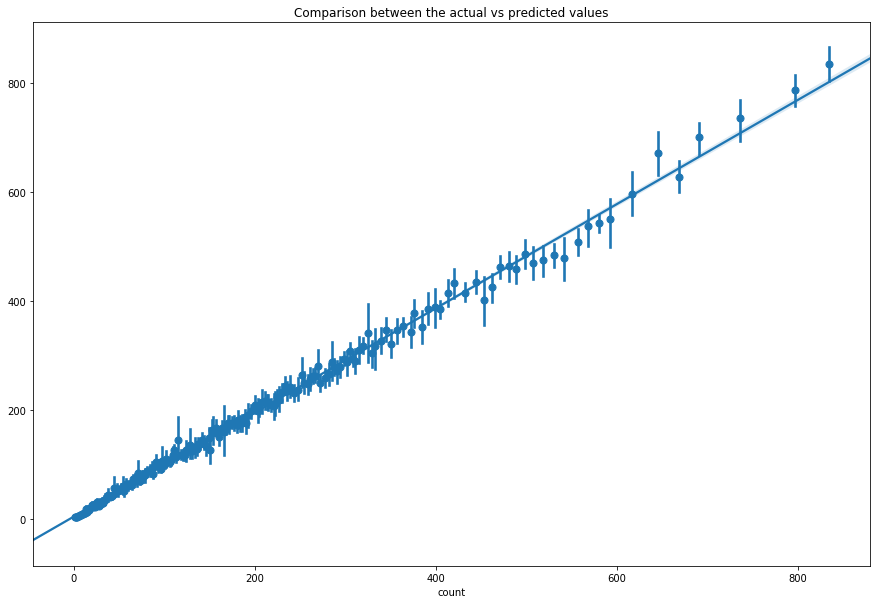

In [7]:
plt.figure(figsize=(15,10))
ax = sn.regplot(y_test,y_pred, x_bins = 200)
ax.set(title = "Comparison between the actual vs predicted values")
plt.show

In [3]:
filename = 'test.csv' 
df_test = pd.read_csv(filename)

df_test.rename(columns={'weathersit':'weather',
                     'mnth':'month',
                     'hr':'hour',
                     'yr':'year',
                     'hum': 'humidity',
                     'cnt':'count'},inplace=True)

df_test['season'] = df_test.season.astype('category')
df_test['year'] = df_test.year.astype('category')
df_test['month'] = df_test.month.astype('category')
#df_test['hour'] = df_test.hour.astype('category')
df_test['holiday'] = df_test.holiday.astype('category')
#df_test['weekday'] = df_test.weekday.astype('category')
df_test['workingday'] = df_test.workingday.astype('category')
df_test['weather'] = df_test.weather.astype('category')

df_test = df_test.drop(['atemp', 'windspeed'], axis=1)
df_test = pd.get_dummies(df_test)

#y_pred = np.exp(rgf.predict(df_test))
y_predc = rgfc.predict(df_test)
y_predr = rgfr.predict(df_test)
y_pred = np.exp(y_predc) + np.exp(y_predr)

for i, y  in enumerate(y_pred):
    if y_pred[i] < 0:
        y_pred[i] = 0

submission = pd.DataFrame()
submission['Id'] = range(y_pred.shape[0])
submission['Predicted'] = y_pred
submission.to_csv("submission_rgf.csv", index=False)
y_pred

array([181.38389156, 422.67078721,  52.37118806, ...,   5.91939899,
       600.06755306, 717.5814804 ])